In [1]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import sys

sys.path.append("..")

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)
print('Successful!')

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.2.2
Successful!


Evaluating HS-SampleWithReplacement.................... 20.6 seconds
Regret: 105.15 +/- 34.63 (median: 42.00, max: 576.00, min: 16.00)
Evaluating HS-SampleWithReplacement.................... 22.5 seconds
Regret: 119.80 +/- 30.09 (median: 52.50, max: 530.00, min: 20.00)
Evaluating HS-SWR_mirrored_pool.................... 50.3 seconds
Regret: 110.65 +/- 40.12 (median: 40.00, max: 664.00, min: 29.00)
Evaluating HS-SWR_mirrored_pool....................

No handles with labels found to put in legend.


 50.9 seconds
Regret: 82.05 +/- 7.62 (median: 91.00, max: 139.00, min: -7.00)
Evaluating HS-SampleWithReplacement.................... 22.5 seconds
Regret: 103.89 +/- 30.99 (median: 74.39, max: 698.09, min: 19.77)
Evaluating HS-SampleWithReplacement.................... 23.0 seconds
Regret: 126.50 +/- 13.70 (median: 111.63, max: 299.13, min: 7.57)
Evaluating HS-SWR_mirrored_pool.................... 51.3 seconds
Regret: 79.33 +/- 7.28 (median: 76.65, max: 131.05, min: -10.70)
Evaluating HS-SWR_mirrored_pool....................

No handles with labels found to put in legend.


 51.1 seconds
Regret: 123.09 +/- 20.90 (median: 106.49, max: 500.86, min: 30.76)


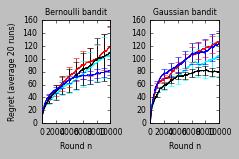

In [2]:
import datetime

algs = [
#    ("TS", {}, "gray", "-", "TS"),
# ("GaussTS", {}, "gray", "-", "TS"),
  #("PHE", {"a": 2.1}, "red", "-", "PHE (a = 2.1)"),
#   ("PHE", {"a": 1.1}, "darkorange", "-", "PHE (a = 1.1)"),
#   ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.5)"),
  #("HistorySwapping", {"swap_prob": 0.01}, "cyan", "-", "HS (swap_prob = 0.01)"),
  #("HistorySwapping", {"swap_prob": 0.03}, "magenta", "-", "HS (swap_prob = 0.03)"),
  #("HistorySwapping", {"swap_prob": 0.1}, "darkgreen", "-", "HS (swap_prob = 0.1)"),
#   ("HistorySwapping", {"swap_prob": 0.15}, "blue", "-", "HS (swap_prob = 0.15)"),
  #("HistorySwapping_SWR", {"sample_portion": 0.03}, "magenta", "-", 
           #"HS_SWR (sample_portion = 0.03)"),
  ("HS_SWR", {"sample_portion": 0.5}, "cyan", "-", 
           "HS_SWR_noise (sample_portion = 0.5)"),
  ("HS_SWR", {"sample_portion": 0.8}, "red", "-", 
           "HS_SWR_noise (sample_portion = 0.8)"),
  ("HS_SWR_MirrorPool", {"sample_portion": 0.5}, "black", "-", 
           "HS_SWR_mirror (sample_portion = 0.5)"),
    ("HS_SWR_MirrorPool", {"sample_portion": 0.8}, "blue", "-", 
           "HS_SWR_mirror (sample_portion = 0.8)"),
]
num_runs = 20
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3, 2))
for fig in range(2):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(GaussBandit(mu))

  plt.subplot(1, 2, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=10)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4] if alg_num // 4 == (fig+1) else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title("Bernoulli bandit")
  else:
    plt.title("Gaussian bandit")
    
  plt.xlabel("Round n")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))
  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("../results/HS_SWR_asnoise_{}_{}_{}_{}.jpeg".format(now.month, now.day, now.hour, now.minute), "wb") as f:
  plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()